In [1]:
!pip install pmdarima

In [17]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [6]:
#url='C:\Users\Aswin\Downloads\Telegram Desktop\TATAMOTORS.csv'
tata=pd.read_csv('C:\\Users\\Aswin\\Downloads\\Telegram Desktop\\TATAMOTORS.csv')
tata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,173.500000,174.199997,171.300003,173.449997,173.449997,6715543
1,2019-01-02,170.600006,171.750000,168.000000,168.550003,168.550003,13410104
2,2019-01-03,169.000000,170.149994,165.100006,166.050003,166.050003,9321842
3,2019-01-04,169.000000,171.949997,168.500000,170.949997,170.949997,17650435
4,2019-01-07,173.199997,178.199997,173.199997,175.350006,175.350006,21438351


In [7]:
tata.shape

(1004, 7)

In [8]:
tata.size

7028

In [9]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1004 non-null   object 
 1   Open       1004 non-null   float64
 2   High       1004 non-null   float64
 3   Low        1004 non-null   float64
 4   Close      1004 non-null   float64
 5   Adj Close  1004 non-null   float64
 6   Volume     1004 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.0+ KB


In [10]:
tata.axes

[RangeIndex(start=0, stop=1004, step=1),
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')]

In [16]:
tata.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
tata.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
tata

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,173.500000,174.199997,171.300003,173.449997,173.449997,6715543
1,2019-01-02,170.600006,171.750000,168.000000,168.550003,168.550003,13410104
2,2019-01-03,169.000000,170.149994,165.100006,166.050003,166.050003,9321842
3,2019-01-04,169.000000,171.949997,168.500000,170.949997,170.949997,17650435
4,2019-01-07,173.199997,178.199997,173.199997,175.350006,175.350006,21438351
...,...,...,...,...,...,...,...
999,2023-01-13,413.000000,416.350006,408.000000,411.500000,411.500000,10449630
1000,2023-01-16,413.500000,414.899994,407.600006,413.000000,413.000000,11462140
1001,2023-01-17,413.000000,419.450012,412.500000,415.299988,415.299988,12337969
1002,2023-01-18,415.899994,415.950012,407.450012,408.399994,408.399994,13310316


In [3]:
tata.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,173.500000,174.199997,171.300003,173.449997,173.449997,6715543
2019-01-02,170.600006,171.750000,168.000000,168.550003,168.550003,13410104
2019-01-03,169.000000,170.149994,165.100006,166.050003,166.050003,9321842
2019-01-04,169.000000,171.949997,168.500000,170.949997,170.949997,17650435
2019-01-07,173.199997,178.199997,173.199997,175.350006,175.350006,21438351
...,...,...,...,...,...,...
2023-01-13,413.000000,416.350006,408.000000,411.500000,411.500000,10449630
2023-01-16,413.500000,414.899994,407.600006,413.000000,413.000000,11462140
2023-01-17,413.000000,419.450012,412.500000,415.299988,415.299988,12337969


In [5]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1004 non-null   object 
 1   Open       1004 non-null   float64
 2   High       1004 non-null   float64
 3   Low        1004 non-null   float64
 4   Close      1004 non-null   float64
 5   Adj Close  1004 non-null   float64
 6   Volume     1004 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.0+ KB


In [21]:
tata.Date=pd.to_datetime(tata.Date)

In [22]:
tata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1004 non-null   datetime64[ns]
 1   Open       1004 non-null   float64       
 2   High       1004 non-null   float64       
 3   Low        1004 non-null   float64       
 4   Close      1004 non-null   float64       
 5   Adj Close  1004 non-null   float64       
 6   Volume     1004 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.0 KB


In [23]:
tata_motors=tata[["Date","Close"]]

In [24]:
tata_motors.set_index('Date',inplace=True)

In [25]:
tata_motors.Date=pd.to_datetime(tata_motors.Date)

AttributeError: 'DataFrame' object has no attribute 'Date'

In [26]:
tata_motors.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2019-01-01 to 2023-01-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1004 non-null   float64
dtypes: float64(1)
memory usage: 15.7 KB


KeyError: 'Date'

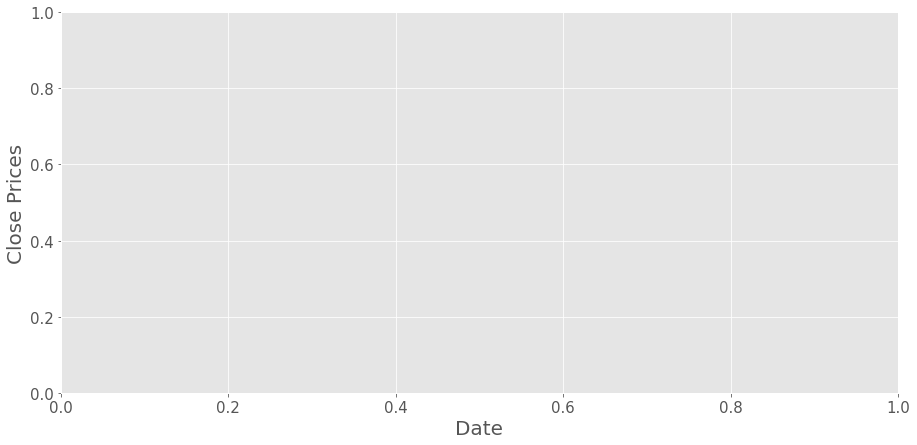

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.grid(True)
plt.xlabel('Date',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize=20) 
plt.yticks(fontsize=15)
plt.plot(tata_motors['Date'],tata_motors['Close'],linewidth=3,color='blue')
plt.title('Tata Motors Stock Closing Price',fontsize=30)
plt.show()

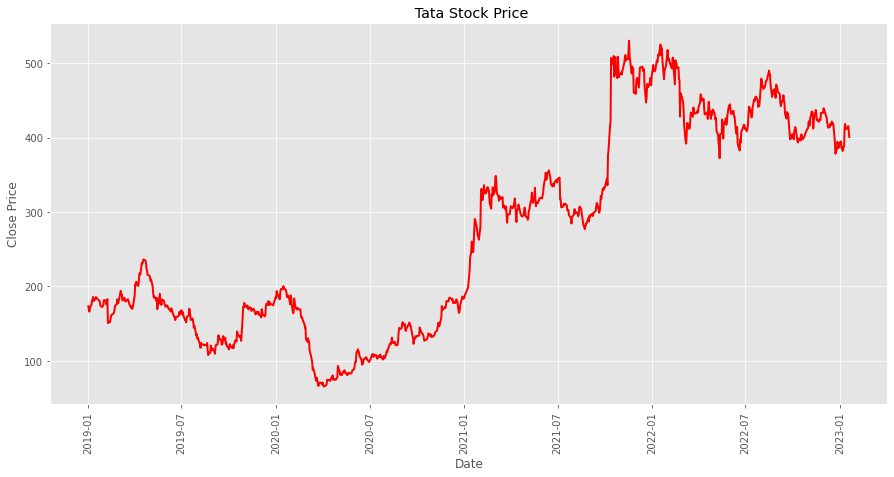

In [28]:
plt.figure(figsize=(15,7))
plt.plot(tata['Date'],tata['Close'],color='red',linewidth=2)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(' Tata Stock Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

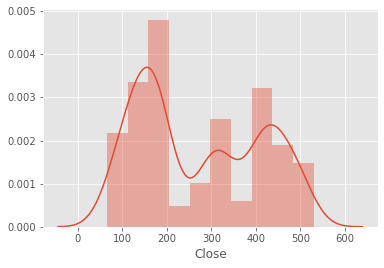

In [29]:
import seaborn as sns
sns.distplot(tata_motors['Close'])

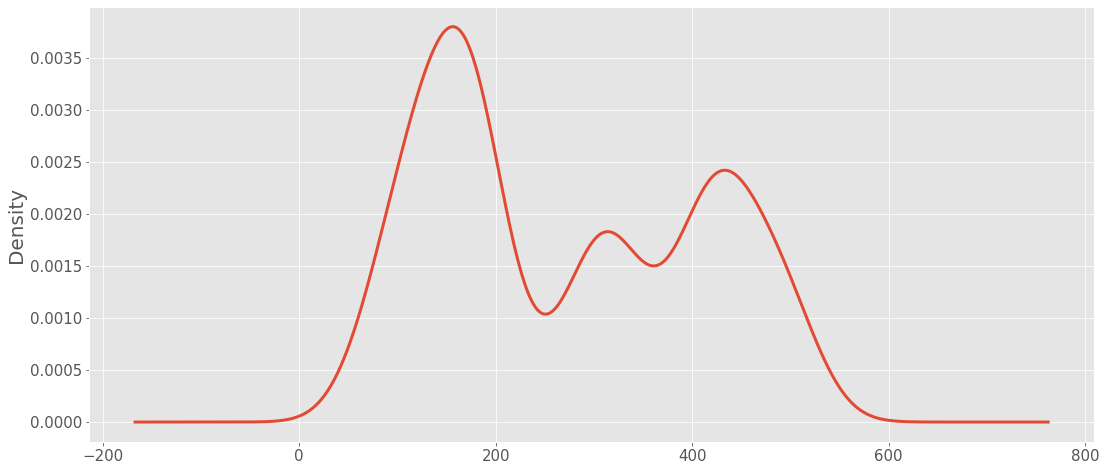

In [30]:
#Distribution of the close price 
df_close=tata_motors['Close']
df_close.plot(kind='kde',figsize=(18,8),linewidth=3)
plt.xticks(fontsize=15)
plt.grid("both")
plt.ylabel('Density',fontsize=20)
plt.yticks(fontsize=15)
plt.show()

In [31]:
tata

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,173.500000,174.199997,171.300003,173.449997,173.449997,6715543
1,2019-01-02,170.600006,171.750000,168.000000,168.550003,168.550003,13410104
2,2019-01-03,169.000000,170.149994,165.100006,166.050003,166.050003,9321842
3,2019-01-04,169.000000,171.949997,168.500000,170.949997,170.949997,17650435
4,2019-01-07,173.199997,178.199997,173.199997,175.350006,175.350006,21438351
...,...,...,...,...,...,...,...
999,2023-01-13,413.000000,416.350006,408.000000,411.500000,411.500000,10449630
1000,2023-01-16,413.500000,414.899994,407.600006,413.000000,413.000000,11462140
1001,2023-01-17,413.000000,419.450012,412.500000,415.299988,415.299988,12337969
1002,2023-01-18,415.899994,415.950012,407.450012,408.399994,408.399994,13310316


In [32]:
type(tata_motors['Close'])

pandas.core.series.Series

In [33]:
type(tata_motors['Date'])

KeyError: 'Date'

In [34]:
np.mean(tata_motors['Close'].head(12))

178.05000050000004

In [35]:
np.mean(tata['Date'].head(12))

Timestamp('2019-01-08 08:00:00')

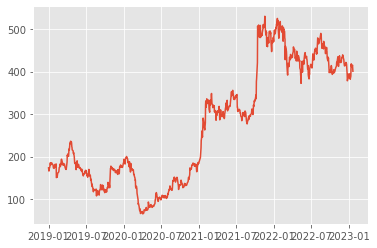

In [36]:
plt.plot(tata['Date'],tata['Close'])

In [37]:
plt.plot(tata_motors['Date'],tata_motors['Close'].rolling(365).mean())

KeyError: 'Date'

In [38]:
plt.plot(tata_motors['Date'],tata_motors['Close'].rolling(365).std())

KeyError: 'Date'

In [39]:
adfuller(tata_motors['Date'],autolag='AIC')

KeyError: 'Date'

In [47]:
rolmean=timeseries.rolling(12).mean()#rollingmean
rolstd=timeseries.rolling(12).std()#rollingstandard	deviation

NameError: name 'timeseries' is not defined

In [40]:
#Test for staionarity 
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean=timeseries.rolling(12).mean() # rolling mean
    rolstd=timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize=(18,8))
    plt.grid('both')
    plt.plot(timeseries,color='blue',label='Original',linewidth=3)
    plt.plot(rolmean,color='red',label='Rolling Mean',linewidth=3)
    plt.plot(rolstd,color='black',label='Rolling Std',linewidth=4)
    plt.legend(loc='best',fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
    plt.title('Rolling Mean and Standard Deviation',fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft=adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values 
    print(output)

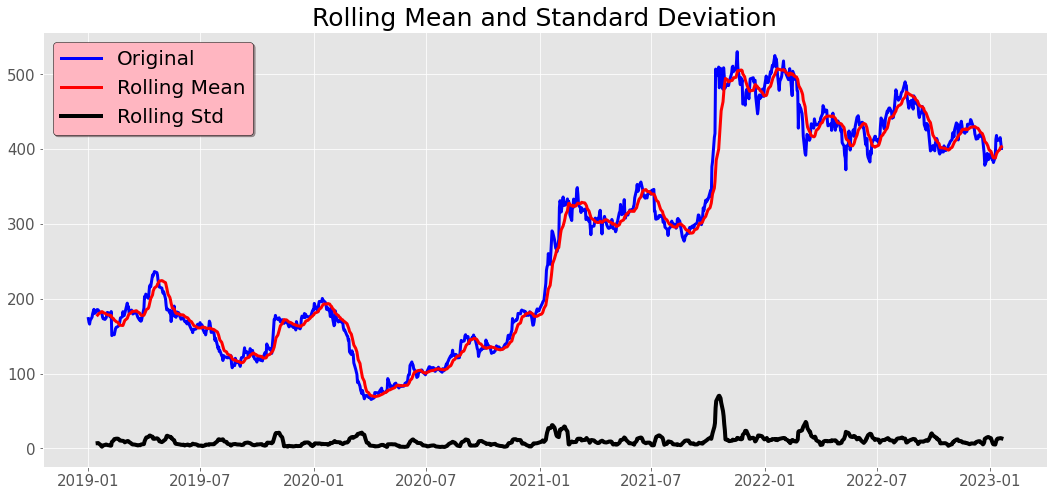

Results of dickey fuller test
Test Statistics                 -0.875760
p-value                          0.795850
No. of lags used                 4.000000
Number of observations used    999.000000
critical value (1%)             -3.436913
critical value (5%)             -2.864437
critical value (10%)            -2.568313
dtype: float64


In [41]:
test_stationarity(tata_motors['Close'])

In [42]:
df_close

Date
2019-01-01    173.449997
2019-01-02    168.550003
2019-01-03    166.050003
2019-01-04    170.949997
2019-01-07    175.350006
                 ...    
2023-01-13    411.500000
2023-01-16    413.000000
2023-01-17    415.299988
2023-01-18    408.399994
2023-01-19    400.750000
Name: Close, Length: 1004, dtype: float64

In [43]:
df_close.diff()

Date
2019-01-01         NaN
2019-01-02   -4.899994
2019-01-03   -2.500000
2019-01-04    4.899994
2019-01-07    4.400009
                ...   
2023-01-13   -0.750000
2023-01-16    1.500000
2023-01-17    2.299988
2023-01-18   -6.899994
2023-01-19   -7.649994
Name: Close, Length: 1004, dtype: float64

In [44]:
tata_close_diff_1=df_close.diff()

In [45]:
tata_close_diff_1

Date
2019-01-01         NaN
2019-01-02   -4.899994
2019-01-03   -2.500000
2019-01-04    4.899994
2019-01-07    4.400009
                ...   
2023-01-13   -0.750000
2023-01-16    1.500000
2023-01-17    2.299988
2023-01-18   -6.899994
2023-01-19   -7.649994
Name: Close, Length: 1004, dtype: float64

In [46]:
tata_close_diff_1.dropna(inplace=True)

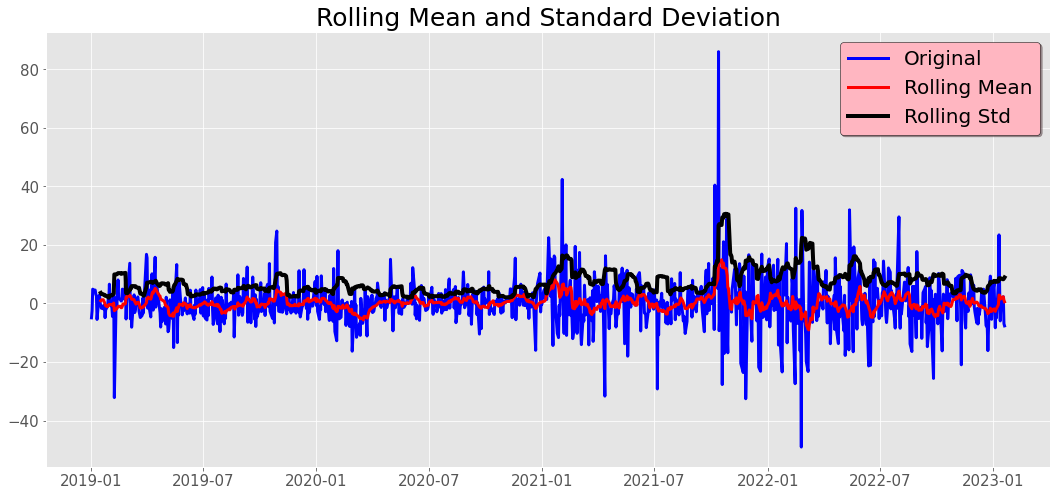

Results of dickey fuller test
Test Statistics               -1.535875e+01
p-value                        3.636669e-28
No. of lags used               3.000000e+00
Number of observations used    9.990000e+02
critical value (1%)           -3.436913e+00
critical value (5%)           -2.864437e+00
critical value (10%)          -2.568313e+00
dtype: float64


In [47]:
test_stationarity(tata_close_diff_1)

In [48]:
train_data=df_close[0:-60]

In [49]:
test_data=df_close[-60:]

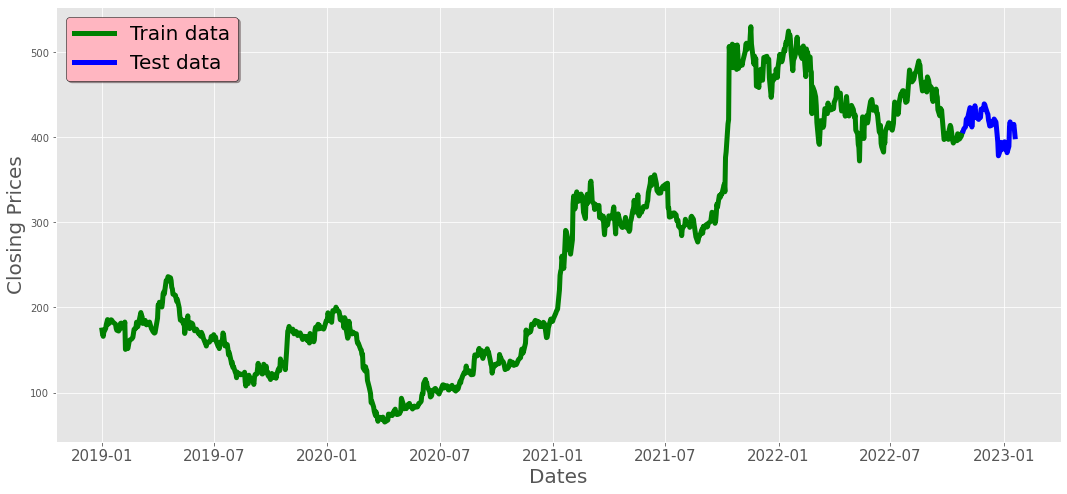

In [50]:
train_data=df_close[0:-60]
test_data=df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',	fontsize	=	20)
plt.ylabel('Closing Prices',	fontsize	=	20)
plt.xticks(fontsize	=	15)
plt.xticks(fontsize	=	15)
plt.plot(train_data,	'green',	label='Train data',	linewidth	=	5) 
plt.plot(test_data,	'blue',	label='Test data',	linewidth	=	5) 
plt.legend(fontsize	=	20,	shadow=True,facecolor='lightpink',edgecolor	=	'k')

In [51]:
var1=tata_close_diff_1

In [52]:
var=tata_close_diff_1[1:]



In [53]:
df=pd.DataFrame([var,var1])


In [54]:
df.T.corr

<bound method DataFrame.corr of                Close     Close
Date                          
2019-01-02       NaN -4.899994
2019-01-03 -2.500000 -2.500000
2019-01-04  4.899994  4.899994
2019-01-07  4.400009  4.400009
2019-01-08  4.599991  4.599991
...              ...       ...
2023-01-13 -0.750000 -0.750000
2023-01-16  1.500000  1.500000
2023-01-17  2.299988  2.299988
2023-01-18 -6.899994 -6.899994
2023-01-19 -7.649994 -7.649994

[1003 rows x 2 columns]>

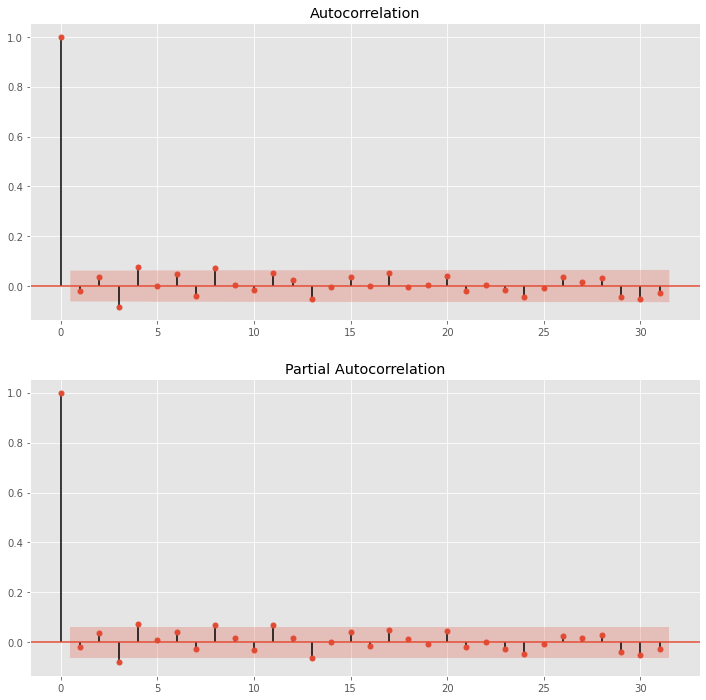

In [55]:
fig	=	plt.figure(figsize=(12,12))
ax1	=	fig.add_subplot(211)#function
fig	=	plot_acf(tata_close_diff_1,	ax=ax1) 
ax2	=	fig.add_subplot(212) 
fig	=	plot_pacf(tata_close_diff_1,	ax=ax2)

In [45]:
def	evaluate_arima_model(X,y,arima_order):
    history=[x for x in X]
    predictions=list()  
    for t in range(len(y)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    rmse=np.sqrt(mean_squared_error(y,predictions))
    return rmse
   

In [46]:
float("inf")

inf

In [78]:
def evaluate_models(dataset,test,p_values,d_values,q_values):
    dataset=dataset.astype('float32')
    best_score,best_cfg=float('inf'),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse=evaluate_arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_cfg,best_score=rmse,order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
    

TypeError: evaluate_models() missing 4 required positional arguments: 'test', 'p_values', 'd_values', and 'q_values'

In [64]:
p_values=range(0,3)

In [65]:
list(p_values)

[0, 1, 2]

In [66]:
train_data

Date
2019-01-01    173.449997
2019-01-02    168.550003
2019-01-03    166.050003
2019-01-04    170.949997
2019-01-07    175.350006
                 ...    
2022-10-19    399.049988
2022-10-20    398.100006
2022-10-21    398.049988
2022-10-24    401.600006
2022-10-25    404.549988
Name: Close, Length: 944, dtype: float64

In [67]:
test_data

Date
2022-10-27    407.700012
2022-10-28    409.899994
2022-10-31    412.750000
2022-11-01    421.350006
2022-11-02    422.149994
2022-11-03    416.250000
2022-11-04    425.350006
2022-11-07    435.000000
2022-11-09    433.149994
2022-11-10    412.200012
2022-11-11    423.500000
2022-11-14    433.700012
2022-11-15    437.149994
2022-11-16    431.549988
2022-11-17    423.149994
2022-11-18    423.799988
2022-11-21    421.100006
2022-11-22    424.700012
2022-11-23    424.049988
2022-11-24    423.399994
2022-11-25    433.200012
2022-11-28    433.250000
2022-11-29    433.149994
2022-11-30    439.399994
2022-12-01    438.250000
2022-12-02    435.399994
2022-12-05    428.750000
2022-12-06    427.100006
2022-12-07    420.100006
2022-12-08    417.200012
2022-12-09    413.299988
2022-12-12    414.149994
2022-12-13    418.500000
2022-12-14    417.899994
2022-12-15    416.700012
2022-12-16    421.600006
2022-12-19    418.000000
2022-12-20    410.500000
2022-12-21    402.600006
2022-12-22    394.45

In [69]:
p_values=range(0,3)
d_values=range(0,3) 
q_values=range(0,3) 
warnings.filterwarnings("ignore") 
evaluate_models(train_data,test_data,p_values,d_values,q_values)


Best ARIMANone RMSE=inf


In [70]:
arima_order=(1,0,1)


In [71]:
history=[x for x in train_data]

In [72]:
history

[173.449997,
 168.550003,
 166.050003,
 170.949997,
 175.350006,
 179.949997,
 183.050003,
 185.75,
 180.300003,
 182.399994,
 185.350006,
 185.449997,
 184.899994,
 183.300003,
 181.5,
 180.850006,
 180.25,
 175.399994,
 173.25,
 172.300003,
 173.600006,
 174.600006,
 181.199997,
 181.649994,
 180.25,
 175.800003,
 178.5,
 182.850006,
 150.699997,
 152.649994,
 151.800003,
 159.850006,
 161.649994,
 162.899994,
 163.75,
 164.800003,
 169.699997,
 174.300003,
 175.75,
 182.649994,
 177.350006,
 177.449997,
 180.300003,
 194.050003,
 188.800003,
 189.300003,
 181.199997,
 181.850006,
 184.800003,
 181.699997,
 179.550003,
 180.0,
 182.25,
 182.850006,
 180.199997,
 175.399994,
 171.300003,
 173.100006,
 169.850006,
 170.550003,
 187.350006,
 202.949997,
 201.350006,
 206.149994,
 205.149994,
 200.550003,
 205.899994,
 216.050003,
 218.199997,
 215.949997,
 231.75,
 230.5,
 236.25,
 234.850006,
 231.649994,
 223.600006,
 221.850006,
 215.600006,
 214.300003,
 207.300003,
 209.449997,
 19

In [75]:
model=ARIMA(history,order=arima_order)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [76]:
model_fit=model.fit()



NameError: name 'model' is not defined

In [77]:
yhat=model_fit.summary()
yhat

NameError: name 'model_fit' is not defined

In [166]:
model=ARIMA(tata_motors['Close'],order=(1,1,1))
model_fit=model.fit()
model.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [180]:
np.random.seed(123)
N = 1000
x = np.random.normal(0, 1, N)
y = np.zeros(N)

In [181]:
for i in range(1, N):
    y[i] = 0.5 * y[i-1] + x[i] + 0.2 * np.sin(2*np.pi*i/100)

In [185]:
mod = sm.tsa.STAR(y)
res = mod.fit()

AttributeError: module 'statsmodels.tsa.api' has no attribute 'STAR'

# Code


In [56]:
from statsmodels.tsa.arima_model import ARIMA

In [57]:
print(tata.shape)
train=tata.iloc[:-30]
test=tata.iloc[-30:]
print(train.shape,test.shape)

(1004, 7)
(974, 7) (30, 7)


In [58]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Close'],order=(1,1,1))
model=model.fit()
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  973
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3446.703
Method:                       css-mle   S.D. of innovations              8.359
Date:                Tue, 14 Feb 2023   AIC                           6901.406
Time:                        16:13:48   BIC                           6920.927
Sample:                             1   HQIC                          6908.835
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2504      0.261      0.960      0.337      -0.261       0.762
ar.L1.D.Close    -0.8704      0.071    -12.237      0.000      -1.010      -0.731
ma.L1.D.Close     0.8204      0.082     